## Import Python Libraries

In [1]:
# package to store and manipulate neural-network input and output data
import numpy as np

# package to graphically display any data
import matplotlib.pyplot as plt

# package to manipulate neural-network models
import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, random_split
from torch.utils.data import TensorDataset

# packages for templating ANN code
import pytorch_lightning as pl

from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.utilities import rank_zero_only
from pytorch_lightning.loggers import LightningLoggerBase

In [2]:
#if notebook is runned in Google Colab, you may need to install PL
#!pip install pytorch_lightning

In [3]:
# remove preexisting traces
#!rm -rf lightning_logs/

In [4]:
print("Pytorch version:", torch.__version__)
print("Pytorch Lightning version:", pl.__version__)

Pytorch version: 1.5.1
Pytorch Lightning version: 0.8.4


In [5]:
if torch.cuda.is_available():
  print('GPU support (%s)' % torch.cuda.get_device_name(0))
else:
  print('no GPU support')

GPU support (GeForce RTX 2080 Ti)


## Get the Data

In [6]:
X_train = np.array([0.765,0.838,0.329,0.277,0.45,0.833,0.44,0.634,0.351,0.784,0.589,0.816,0.352,0.591,0.04,0.38,0.816,0.732,0.32,0.597,0.908,0.146,0.691,0.75,0.568,0.866,0.705,0.027,0.607,0.793,0.864,0.057,0.877,0.164,0.729,0.291,0.324,0.745,0.158,0.098,0.113,0.794,0.452,0.765,0.983,0.001,0.474,0.773,0.155,0.875,])
Y_train = np.array([6.322,6.254,3.224,2.87,4.177,6.267,4.088,5.737,3.379,6.334,5.381,6.306,3.389,5.4,1.704,3.602,6.306,6.254,3.157,5.446,5.918,2.147,6.088,6.298,5.204,6.147,6.153,1.653,5.527,6.332,6.156,1.766,6.098,2.236,6.244,2.96,3.183,6.287,2.205,1.934,1.996,6.331,4.188,6.322,5.368,1.561,4.383,6.33,2.192,6.108,])
X_val = np.array([0.329,0.528,0.323,0.952,0.868,0.931,0.69,0.112,0.574,0.421,0.972,0.715,0.7,0.58,0.69,0.163,0.093,0.695,0.493,0.243,0.928,0.409,0.619,0.011,0.218,0.647,0.499,0.354,0.064,0.571,0.836,0.068,0.451,0.074,0.158,0.571,0.754,0.259,0.035,0.595,0.245,0.929,0.546,0.901,0.822,0.797,0.089,0.924,0.903,0.334,])
Y_val = np.array([3.221,4.858,3.176,5.617,6.141,5.769,6.081,1.995,5.259,3.932,5.458,6.193,6.129,5.305,6.081,2.228,1.912,6.106,4.547,2.665,5.791,3.829,5.619,1.598,2.518,5.826,4.603,3.405,1.794,5.23,6.26,1.81,4.18,1.832,2.208,5.234,6.306,2.759,1.684,5.432,2.673,5.781,5.019,5.965,6.295,6.329,1.894,5.816,5.951,3.258,])

In [7]:
print('X_train contains %d samples' % X_train.shape)
print('Y_train contains %d samples' % Y_train.shape)
print('')
print('X_val contains %d samples' % X_val.shape)
print('Y_val contains %d samples' % Y_val.shape)

X_train contains 50 samples
Y_train contains 50 samples

X_val contains 50 samples
Y_val contains 50 samples


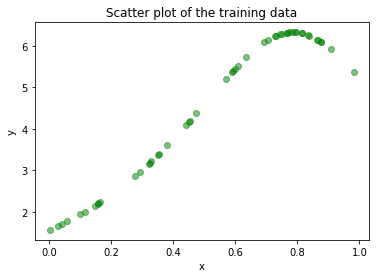

In [8]:
# Graphically display our training data
plt.scatter(X_train, Y_train, color='green', alpha=0.5)
plt.title('Scatter plot of the training data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

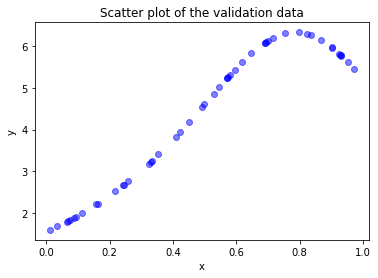

In [9]:
# Graphically display our test data
plt.scatter(X_val, Y_val, color='blue', alpha=0.5)
plt.title('Scatter plot of the validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
## Build the artificial neural-network

In [11]:
class ANN(pl.LightningModule):

  def __init__(self):
    
    super().__init__()
    self.layer_1 = torch.nn.Linear(1, 8)
    self.layer_2 = torch.nn.Linear(8, 8)
    self.layer_o = torch.nn.Linear(8, 1)
    
    
  def forward(self, x):
    #x = x.view(1, -1)
    x = self.layer_1(x)
    x = torch.nn.functional.relu(x)
    x = self.layer_2(x)
    x = torch.nn.functional.relu(x)
    x = self.layer_o(x)
    return(x)
      
  def train_dataloader(self):
    
    X_train2 = torch.from_numpy(X_train).unsqueeze(1).float()
    Y_train2 = torch.from_numpy(Y_train).unsqueeze(1).float()

    dataset = TensorDataset(X_train2, Y_train2)
    return DataLoader(dataset, num_workers=1, batch_size=1)

  def val_dataloader(self):
    
    X_val2 = torch.from_numpy(X_val).unsqueeze(1).float()
    Y_val2 = torch.from_numpy(Y_val).unsqueeze(1).float()

    dataset = TensorDataset(X_val2, Y_val2)
    return DataLoader(dataset, num_workers=1, batch_size=1)

  def test_dataloader(self):
    
    X_test = np.array([0., 0.2, 0.4, 0.6, 0.8, 1.0])
    Y_test = np.tan(np.sin(self.X_test) + np.cos(self.X_test)) 

    X_test2 = torch.from_numpy(X_test).unsqueeze(1).float()
    Y_test2 = torch.from_numpy(Y_test).unsqueeze(1).float()

    dataset = TensorDataset(X_test2, Y_test2)
    
    return DataLoader(dataset, num_workers=1, batch_size=1)

  def configure_optimizers(self):
    optimizer = optim.SGD(self.parameters(), lr=0.02)
    return optimizer

  # optional
  def mse_loss(self, output, target):
    mean_squared_error = torch.sum((output - target) ** 2)/target.shape[0]
    return mean_squared_error

  def training_step(self, train_batch, batch_nb):
    
    x, target = train_batch
    output = self.forward(x)
    loss = self.mse_loss(output, target)
    logs = {'train_loss': loss}
    return {'loss': loss, 'log': logs}
    
  def validation_step(self, valid_batch, batch_nb):
  
    x, target = valid_batch
    output = self.forward(x)
    loss = self.mse_loss(output, target)
    logs = {'val_loss': loss}
    return {'val_loss': loss, 'log': logs}

  def validation_epoch_end(self, outputs):
    val_loss_mean = torch.stack([x['val_loss'] for x in outputs]).mean()
    return {'val_loss': val_loss_mean}

  def test_step(self, test_batch, batch_nb):
  
    x, target = test_batch
    output = self.forward(x)
    loss = self.mse_loss(output, target)
    return {'test_loss': loss}

In [12]:
ann_model = ANN()

In [13]:
print('params:', sum(p.numel() for p in ann_model.parameters()))
print('trainable_params:', sum(p.numel() for p in ann_model.parameters() if p.requires_grad))

params: 97
trainable_params: 97


## Train the artificial neural-network model

In [14]:
# default used by the Trainer
early_stopping = EarlyStopping(
    monitor='val_loss',    
    mode='min',
    patience=10,
    strict=True,
    verbose=False,
)

In [15]:
# There might currently a bug with PL and underlying tqdm package
# with displays "HBox(children=..." lines instead of progress bar :-(
# in order to avoid it, you need to install jupyter lab extension
# jupyter nbextension enable --py widgetsnbextension

# look at all possible *training* options at:
# https://pytorch-lightning.readthedocs.io/en/latest/trainer.html
trainer = pl.Trainer(max_epochs=1000, check_val_every_n_epoch=1, progress_bar_refresh_rate=0)
#trainer = pl.Trainer(distributed_backend='dp', gpus=2, max_epochs=20000, check_val_every_n_epoch=1, early_stop_callback=early_stopping)
#, logger=my_logger)

trainer.fit(ann_model)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
/home/arc/.local/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:25: RuntimeWarning: You have defined a `test_dataloader()` and have defined a `test_step()`, you may also want to define `test_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)

  | Name    | Type   | Params
-----------------------------------
0 | layer_1 | Linear | 16    
1 | layer_2 | Linear | 72    
2 | layer_o | Linear | 9     
/home/arc/.local/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:25: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 28 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/home/arc/.local/lib/python3.6/site-packages/pytorch_lightning/utilities/distributed.py:25: Use

1

In [16]:
%reload_ext tensorboard
%tensorboard --logdir lightning_logs/

Reusing TensorBoard on port 6006 (pid 11162), started 4:26:33 ago. (Use '!kill 11162' to kill it.)

In [17]:
X_valt = torch.from_numpy(X_val).unsqueeze(1).float()
Ŷ_valt = ann_model(X_valt)
Ŷ_valt
Ŷ_val = []
i = 0
for i in range(Ŷ_valt.shape[0]):
    val  = Ŷ_valt[i][0].detach().numpy()
    Ŷ_val.append(val)

## Infer new output data

In [18]:
X_test = np.array([0., 0.2, 0.4, 0.6, 0.8, 1.0])
X_testt = torch.from_numpy(X_test).unsqueeze(1).float()
Ŷ_testt = ann_model(X_testt)
Ŷ_testt
Ŷ_test = []
i = 0
for i in range(Ŷ_testt.shape[0]):
    val  = Ŷ_testt[i][0].detach().numpy()
    Ŷ_test.append(val)

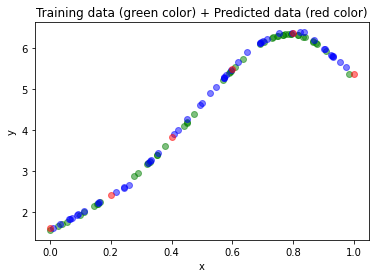

In [19]:
# Display training data and predicted data graphically
plt.title('Training data (green color) + Predicted data (red color)')

# training data in green color
plt.scatter(X_train, Y_train, color='green',  alpha=0.5)

# valid data in blue color
plt.scatter(X_val, Ŷ_val, color='blue',  alpha=0.5)

# predicted data in blue color
plt.scatter(X_test, Ŷ_test, color='red',  alpha=0.5)
#plt.scatter(model.X_test, predictions_actual[0].numpy() , color='green',  alpha=0.5)

plt.xlabel('x')
plt.ylabel('y')
plt.show()